In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(autoload_with=engine)


# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [6]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [7]:
# View all of the classes that automap found

# Using the inspector to print the column names within the 'measurement' table and its types

print ("---- Measurement table information --------")

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])


print ("\n ---- Station table information --------")

columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

---- Measurement table information --------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

 ---- Station table information --------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Save references to each table

# Map Measurement class
Measurement = Base.classes.measurement

# Map Station class
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.


dates = session.query(Measurement).order_by(Measurement.date).all()

for date in dates:
    print(f"Date: {date.date}, Station: {date.station}, Precipitation: {date.prcp}")



# Total dates

print ("\n----- Total dates------\n")
totald = session.query(func.count(Measurement.date)).all()
print (totald)

# Earliest Date

print ("\n----- Earliest Date------\n")
date = session.query(Measurement.date).order_by(Measurement.date).first()
print (date)


# Latest Date

print ("\n----- Latest Date-------\n")
date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print (date)

Date: 2010-01-01, Station: USC00519397, Precipitation: 2.0
Date: 2010-01-01, Station: USC00513117, Precipitation: 7.1
Date: 2010-01-01, Station: USC00518838, Precipitation: 5.3
Date: 2010-01-01, Station: USC00519523, Precipitation: 3.8
Date: 2010-01-01, Station: USC00519281, Precipitation: 3.8
Date: 2010-01-01, Station: USC00511918, Precipitation: 1.3
Date: 2010-01-01, Station: USC00516128, Precipitation: 3.6
Date: 2010-01-02, Station: USC00519397, Precipitation: 0.0
Date: 2010-01-02, Station: USC00513117, Precipitation: 0.0
Date: 2010-01-02, Station: USC00518838, Precipitation: 0.5
Date: 2010-01-02, Station: USC00519523, Precipitation: 0.0
Date: 2010-01-02, Station: USC00519281, Precipitation: 0.0
Date: 2010-01-02, Station: USC00511918, Precipitation: 0.0
Date: 2010-01-02, Station: USC00516128, Precipitation: 0.0
Date: 2010-01-03, Station: USC00519397, Precipitation: 0.0
Date: 2010-01-03, Station: USC00513117, Precipitation: 0.0
Date: 2010-01-03, Station: USC00518838, Precipitation: 0

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# The most recent day as per the query above is 2017-08-23

# Calculate the date one year from the last date in data set.

#One year is going be assumed as 365 days as the last day was in 2017 which had 365 days (The year 2017 had 365 days. The year 2016 had 366 days.)

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


# Perform a query to retrieve the data and precipitation scores

sel = [Measurement.date, Measurement.prcp]

# data = session.query(Measurement.id ,Measurement.station, Measurement.date, Measurement.prcp,Measurement.tobs).\
#      filter(Measurement.date >= query_date).order_by(Measurement.date).all()

data = session.query(Measurement.date, Measurement.prcp).\
     filter(Measurement.date >= query_date).\
     order_by(Measurement.date).all()

# data = session.query(Measurement.date, Measurement.prcp).\
#      order_by(Measurement.date.asc()).\
#      filter(func.strftime(Measurement.date) >= query_date).all()

data

# data2 = engine.execute("Select date, pcrp from measurement where date >= '2016-08-23' ")
# Save the query results as a Pandas DataFrame and set the index to the date column

# df = pd.DataFrame(data, columns=['id' ,'station', 'date', 'prcp','tobs'])
# df.set_index('date', inplace=True)

# df = pd.DataFrame(data, columns=['date', 'prcp'])
# df.set_index('date', inplace=True)
# df.plot.bar()
# plt.tight_layout()
# plt.show()
# # # Sort the dataframe by date

# # df = df.sort_index()

# # # Use Pandas Plotting with Matplotlib to plot the data

# # df.plot()


Query Date:  2016-08-23


[('2016-08-23', 0.0),
 ('2016-08-23', 3.8),
 ('2016-08-23', 1.3),
 ('2016-08-23', None),
 ('2016-08-23', 0.5),
 ('2016-08-23', 45.5),
 ('2016-08-23', 17.8),
 ('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9

In [18]:

dates = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).order_by(Measurement.date).all()

In [20]:
 df = pd.DataFrame(dates, columns=['date', 'prcp'])

In [24]:
query_date

datetime.date(2016, 8, 23)

In [25]:
date

('2017-08-23',)

In [23]:
df

,date,prcp
0,2016-08-23,0.0
1,2016-08-23,3.8
2,2016-08-23,1.3
3,2016-08-23,NaN
4,2016-08-23,0.5
...,...,...
2225,2017-08-22,12.7
2226,2017-08-23,0.0
2227,2017-08-23,0.0
2228,2017-08-23,2.0


In [29]:
prcp_df = df.copy

prcp_df.set_index('date', inplace=True)
prcp_df.plot.bar()
plt.tight_layout()
plt.show()

AttributeError: 'function' object has no attribute 'set_index'

In [28]:
prcp_df

<bound method NDFrame.copy of             date  prcp
0     2016-08-23   0.0
1     2016-08-23   3.8
2     2016-08-23   1.3
3     2016-08-23   NaN
4     2016-08-23   0.5
...          ...   ...
2225  2017-08-22  12.7
2226  2017-08-23   0.0
2227  2017-08-23   0.0
2228  2017-08-23   2.0
2229  2017-08-23  11.4

[2230 rows x 2 columns]>

In [30]:
df.set_index('date')

,prcp
date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,NaN
2016-08-23,0.5
...,...
2017-08-22,12.7
2017-08-23,0.0
2017-08-23,0.0


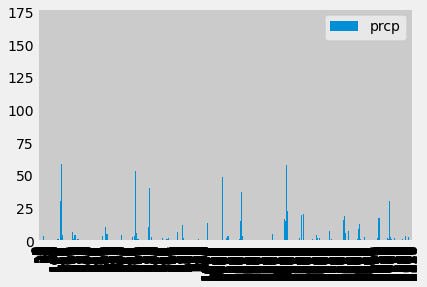

In [31]:
df.plot.bar()

In [68]:
df = pd.DataFrame(data, columns=['date', 'prcp'])



In [69]:
df2 = df.sort_values('date')

In [72]:
df2

,prcp
date,
2016-08-23,0.0
2016-08-23,NaN
2016-08-23,45.5
2016-08-23,1.3
2016-08-23,3.8
...,...
2017-08-22,0.0
2017-08-23,0.0
2017-08-23,0.0


In [45]:
df2.set_index('date', inplace=True)
df2.plot(kind='bar', rotation = 90)
# plt.tight_layout()
# plt.show()

NameError: name 'df2' is not defined

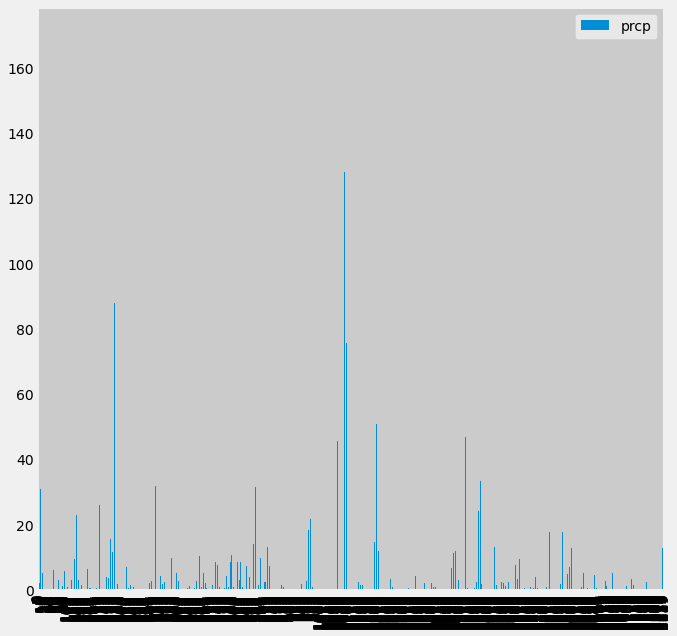

In [66]:
df.plot(kind='bar',rot = 90, figsize=(10,10))
# plt.xticks(rotation='vertical')

In [58]:
df3 = df.dropna()

AttributeError: 'Text' object has no property 'step'

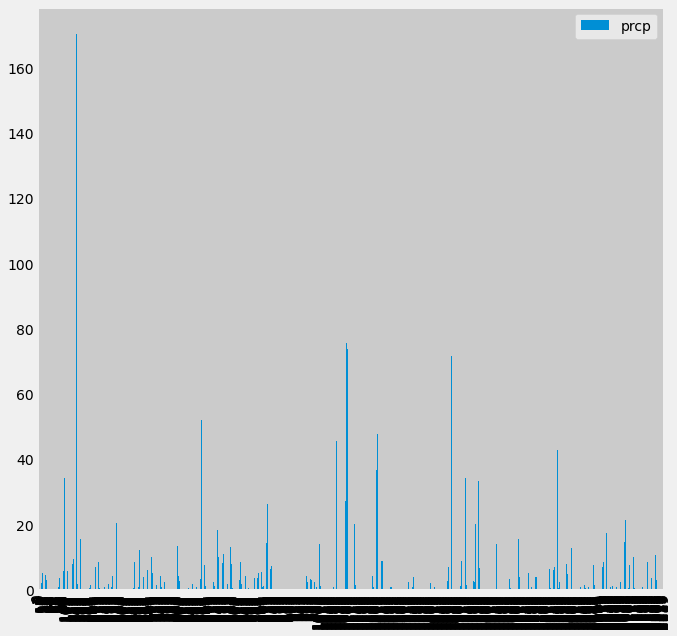

In [60]:
df3.plot(kind='bar',figsize=(10,10),)

In [42]:
x = [value for values in df.index.values ]

x_axis = np.arange(len(x))

NameError: name 'value' is not defined

In [41]:
x

<bound method IndexOpsMixin.tolist of RangeIndex(start=0, stop=2230, step=1)>

In [34]:
y = df.prcp.to_list

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

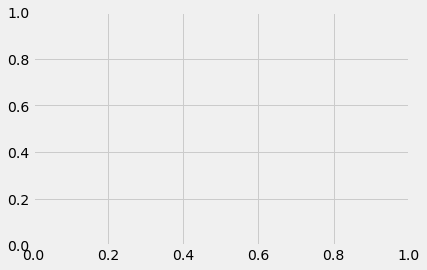

In [35]:
plt.bar(x_axis, y, color="b", align="center")

In [32]:
# # Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(data, columns=['id' ,'station', 'date', 'prcp','tobs'])
df.set_index('date', inplace=True)

# # Sort the dataframe by date

# df.sort_values

# # Use Pandas Plotting with Matplotlib to plot the data

# df.plot.hist()

In [61]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number stations in the dataset

stations = session.query(Measurement).order_by(Measurement.station).all()

for station in stations:
    print(f"Station: {station.station}, Precipitation: {station.prcp}, TOBS: {station.tobs}")


Station: USC00511918, Precipitation: 1.3, TOBS: 18.9
Station: USC00511918, Precipitation: 0.0, TOBS: 21.1
Station: USC00511918, Precipitation: 0.0, TOBS: 23.9
Station: USC00511918, Precipitation: 0.0, TOBS: 23.9
Station: USC00511918, Precipitation: 0.0, TOBS: 23.9
Station: USC00511918, Precipitation: 2.0, TOBS: 22.2
Station: USC00511918, Precipitation: 1.0, TOBS: 21.1
Station: USC00511918, Precipitation: 0.0, TOBS: 17.2
Station: USC00511918, Precipitation: 0.0, TOBS: 20.0
Station: USC00511918, Precipitation: 0.0, TOBS: 23.3
Station: USC00511918, Precipitation: 1.3, TOBS: 17.8
Station: USC00511918, Precipitation: 0.0, TOBS: 13.9
Station: USC00511918, Precipitation: 0.0, TOBS: 13.9
Station: USC00511918, Precipitation: 0.0, TOBS: 18.3
Station: USC00511918, Precipitation: 0.0, TOBS: 13.3
Station: USC00511918, Precipitation: 0.0, TOBS: 18.9
Station: USC00511918, Precipitation: 0.0, TOBS: 22.8
Station: USC00511918, Precipitation: 0.0, TOBS: 16.1
Station: USC00511918, Precipitation: 0.0, TOBS

In [16]:

# stations_grp= session.query(Measurement).group_by(Measurement.station).order_by(func.co).all()


stations_grp= session.query(Measurement).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


In [32]:
for row in stations_grp:
    print (row.station)

USC00519281
USC00519397
USC00513117
USC00519523
USC00516128
USC00514830
USC00511918
USC00517948
USC00518838


In [30]:
total_count = session.query(Measurement.station).distinct().count()

In [33]:
total_count

9

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [37]:
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 12.2, 29.4, 22.03582251082252),
 ('USC00519397', 13.3, 30.6, 23.643098384728138),
 ('USC00513117', 15.0, 29.4, 22.602141011443422),
 ('USC00519523', 13.3, 29.4, 23.634057699512883),
 ('USC00516128', 14.4, 28.9, 21.62166921898927),
 ('USC00514830', 14.4, 29.4, 23.817756584922684),
 ('USC00511918', 11.7, 30.6, 22.00919656392112),
 ('USC00517948', 14.4, 30.6, 23.712172011661778),
 ('USC00518838', 14.4, 28.3, 22.623287671232877)]

In [42]:
res = session.query(Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [56]:
print (f"The most active station was {res[0][0]}.\nThe minimum temperature for the station was {res[0][1]} degC.\nThe maximum temperature for the station was {res[0][2]} degC.\nThe average temperature for the station was {res[0][3]} degC.")

The most active station was USC00519281.
The minimum temperature for the station was 12.2 degC.
The maximum temperature for the station was 29.4 degC.
The average temperature for the station was 22.03582251082252 degC.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()